In [1]:
import pandas as pd # Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÍ∏∞ ÏúÑÌïú Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏù∏ Ìå®ÌÇ§ÏßÄ
import re     
import glob
import os
from pandas import DataFrame
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from konlpy.tag import Mecab
import numpy as np
import matplotlib as mpl
from wordcloud import WordCloud
import matplotlib.pylab as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False

from tqdm import tqdm_notebook

### ÎÇ†ÏßúÎç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú

In [3]:
## ÎåìÍ∏Ä ÌååÏùºÏù¥ ÏûàÎäî Ïú†ÌäúÎ≤ÑÎßå ÎßåÎì§Ïñ¥Ï£ºÏÑ∏Ïöî.
df = pd.read_csv('Ïä§Ìè¨Ï∏†Î¶¨Ïä§Ìä∏.csv',encoding='cp949')
name_list = df['Ïù¥Î¶Ñ'].values
print(name_list)

# Ï†ÑÏ≤¥ Ïú†ÌäúÎ≤Ñ ÌïúÎ≤àÏóê ÎèåÎ¶¨Îäî ÏΩîÎìú

for name in name_list:
    
    # Í∞Å Ïù¥Î¶ÑÏóê ÎßûÎäî info ÌååÏùº Î∂àÎü¨ÏôÄÏÑú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï†ÄÏû•
    df = pd.read_csv(f'{name}/{name}_info.csv')


    # columnÏóê UnnamesÍ∞Ä ÏÉàÎ°ú ÏÉùÍ≤®ÏÑú column Îã§Ïãú ÏßÄÏ†ïÌï¥Ï§å
    df.columns = ['', 'name', 'thumbnail', 'view', 'previous_time',
              'video_url', 'start_date', 'comment', 'likes_num', 'unlikes_num', 'time_duration']

    # start_dateÎ•º Î¶¨Ïä§Ìä∏Î°ú
    date_list = np.array(df['start_date'])

    # ÎÇ†ÏßúÎßå ÎΩëÏïÑ Ïò§Îäî Ï†ïÍ∑úÌëúÌòÑÏãù
    p = re.compile("\d{4}[.]\s\d+[.]\s\d+[.]")

    # Ï†ïÍ∑úÌëúÌòÑÏãùÏóê ÎßûÎäî ÎÇ†Ïßú Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏

    new_date = [] # Ï†ïÍ∑úÌëúÌòÑÏãùÏóê ÎßûÎäî Îç∞Ïù¥ÌÑ∞ Î∞∞Ïó¥
    real_date = [] # Î¶¨Ïä§Ìä∏ ÏïàÏùò ÏõêÏÜåÎßå ÎÑ£ÏùÑ Î¶¨Ïä§Ìä∏

    # ÎÇ†Ïßú Ï†ÄÏû•
    for date in date_list:
        new_date.append(re.findall(p, date))

    # 2Ï∞®Ïõê Î∞∞Ïó¥ÏùÑ 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÎßåÎì§Ïñ¥ Ï§å (ÎåÄÍ¥ÑÌò∏ ÏïàÎ∂ôÍ≤å....)

    for i in new_date:
        try:
            real_date.append(i[0])
        except:
            real_date.append('2020. 3. 1.')

    # real_date = np.ravel(new_date)   

    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò start_date Ïª¨ÎüºÏóê Í∞í Ï†ÄÏû•
    df['start_date2'] = real_date
    del df['start_date']

    # infoÌååÏùº ÎçÆÏñ¥Ïì∞Í∏∞
    df.to_csv(f'{name}/{name}_info.csv', index = False, encoding = 'utf-8-sig')

    print(f'{name} Ï†ÄÏû• ÏôÑÎ£å')

['GoAle' 'JK ÏïÑÌä∏ÏÇ¨Ïª§ Ïò®ÎùºÏù∏' 'Minsoo Go' 'ROAD FIGHTING CHAMPIONSHIP'
 'Shoot for Love ÏäõÌè¨Îü¨Î∏å' 'SomiFit' 'Í∞ïÌïòÎÇòÏä§Ìä∏Î†àÏπ≠' 'ÍΩÅÎ≥ëÏßÄtv' 'ÎßêÏôïTV' 'Î∞ïÎ¨∏ÏÑ± Îã¨ÏàòÎÑ§ÎùºÏù¥Î∏å'
 'ÏÑùÍæ∏Ï∂ïÍæ∏' 'Ïù¥Ïä§ÌÉÄTV' 'Ïû¨ÎØ∏Ïñ¥Ìä∏' 'Ï∞®ÎèÑÎ•¥' 'ÌîºÏßÄÏª¨Í∞§Îü¨Î¶¨' 'ÌùëÏûêÌó¨Ïä§SurplusHealth' 'ÌûôÏúºÎú∏']


### Î∂àÏö©Ïñ¥ÏÇ¨Ï†Ñ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÏàòÏ†ï

In [7]:
f= pd.read_csv('Î∂àÏö©Ïñ¥ÏÇ¨Ï†Ñ(ÌïúÍ∏ÄÏûê).csv',encoding='cp949')
stop_list = list(f)
Unnamed = 'Unnamed: '+ str(len(stop_list)-1)
stop_list.extend(['Ïú†ÌäúÎ∏å','ÏòÅÏÉÅ','ÌûôÏúºÎú∏','ÌùëÏûê','Îπ°Îπ°Ïù¥','ÌòÅÏ§Ä','Ï∞®ÎèÑÎ•¥','ÌûòÏΩ©','Ïù¥Ìòï','ÏÑùÍæ∏',
                 'Î∞ïÎ¨∏ÏÑ±','ÎßêÏôï','Î≥ëÏßÄ','Í∞ïÌïòÎÇò','ÏõêÎãò','ÏäõÌè¨Îü¨Î∏å','Ï†ïÎ¨∏Ìôç','Ï†úÏù¥','ÏºÄÏù¥','ÏïåÎ†à'])
stop_words = set(stop_list)

stop_words.remove(Unnamed)

# stop_words

# Îã®Ïñ¥ ÏÉàÎ°ú Ï∂îÍ∞ÄÌñàÏùÑ ÎïåÏóê ÏÇ¨Ïö©!!!
f = open('Î∂àÏö©Ïñ¥ÏÇ¨Ï†Ñ(ÌïúÍ∏ÄÏûê).csv','w')
for i in stop_words:
    f.write(i+',')
f.close()

### Ïù∏ÏΩîÎî© ÏóêÎü¨Îú∞ Îïå ÏàúÏ∞®Î°ú Ïã§Ìñâ('euc-kr' or 'cp949')

In [ ]:
# # #Ïù∏ÏΩîÎî© ÏóêÎü¨Îú∞ÎïåÎßå Ïã§Ìñâ
# youtube_channel = input("Ïú†Ìà¨Î∏å Ï±ÑÎÑê Ïù¥Î¶Ñ ÏûÖÎ†•ÌïòÏãúÏò§.")
# date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='cp949')

In [ ]:
# # #Ïù∏ÏΩîÎî© ÏóêÎü¨Îú∞ÎïåÎßå Ïã§Ìñâ


# date.to_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='utf-8-sig',index=False)

## ÌÖçÏä§Ìä∏ ÎßàÏù¥Îãù ÏãúÏûë

In [9]:
name_list

array(['GoAle', 'JK ÏïÑÌä∏ÏÇ¨Ïª§ Ïò®ÎùºÏù∏', 'Minsoo Go', 'ROAD FIGHTING CHAMPIONSHIP',
       'Shoot for Love ÏäõÌè¨Îü¨Î∏å', 'SomiFit', 'Í∞ïÌïòÎÇòÏä§Ìä∏Î†àÏπ≠', 'ÍΩÅÎ≥ëÏßÄtv', 'ÎßêÏôïTV',
       'Î∞ïÎ¨∏ÏÑ± Îã¨ÏàòÎÑ§ÎùºÏù¥Î∏å', 'ÏÑùÍæ∏Ï∂ïÍæ∏', 'Ïù¥Ïä§ÌÉÄTV', 'Ïû¨ÎØ∏Ïñ¥Ìä∏', 'Ï∞®ÎèÑÎ•¥', 'ÌîºÏßÄÏª¨Í∞§Îü¨Î¶¨',
       'ÌùëÏûêÌó¨Ïä§SurplusHealth', 'ÌûôÏúºÎú∏'], dtype=object)

ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : GoAle
2020. 6. 5.
2020. 6. 4.
2020. 5. 29.
2020. 5. 27.
2020. 5. 26.
2020. 5. 22.
2020. 5. 21.
2020. 5. 20.
2020. 5. 18.
2020. 5. 15.
2020. 5. 14.
2020. 5. 12.
2020. 5. 10.
2020. 5. 8.
2020. 5. 8.
2020. 5. 7.
2020. 5. 4.
2020. 5. 3.
2020. 5. 2.
2020. 5. 1.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


C:\Users\acorn\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')



GoAle date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
GoAletoken_result Ï†ÄÏû• ÏôÑÎ£å


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:138: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



{'ÏòÅÏÉÅ': 532, 'ÏïåÎ†à': 514, 'Ìò∏': 403, 'Ï∂ïÍµ¨': 396, 'Ï¢ãÏùÄ': 259, 'Ìï≠ÏÉÅ': 248, 'Í≥†Ï≤¥': 203, 'Ìã∞ÎÖ∏': 201, 'ÏÑ†Ïàò': 173, 'Î≥¥Í≥†': 160, 'ÌôîÏù¥ÌåÖ': 160, 'Ïó∞Ïäµ': 158, 'Ìòï': 151, 'Ïó≠Ïãú': 125, 'ÏäàÌåÖ': 118, 'Î¨¥Î¶¨Îâ¥': 109, 'Ìå¨Ï∏†': 106, 'Ï†ïÎßê': 102, 'Ïò§Îäò': 91, 'Ï∂ïÍµ¨Ìôî': 91, 'Î∞ï': 86, 'Í∞êÎèÖ': 84, 'Í∞ôÏïÑÏöî': 81, 'Ìô©ÏùòÏ°∞': 81, 'Í∞ÄÎìú': 80, 'Î¶∞': 76, 'Í∞ïÏùò': 74, 'Í≤åÏûÑ': 74, 'ÏäõÌåÖ': 71, 'ÍøÄÌåÅ': 71}


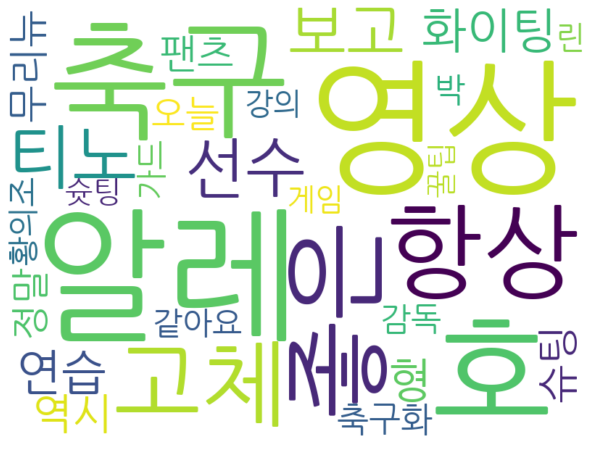

GoAleword cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : JK ÏïÑÌä∏ÏÇ¨Ïª§ Ïò®ÎùºÏù∏
2020. 6. 3.
2020. 5. 30.
2020. 5. 24.
2020. 5. 23.
2020. 5. 19.
2020. 5. 15.
2020. 5. 8.
2020. 5. 2.
2020. 4. 25.
2020. 4. 18.
2020. 4. 14.
2020. 4. 11.
2020. 4. 10.
2020. 4. 4.
2020. 4. 3.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14



JK ÏïÑÌä∏ÏÇ¨Ïª§ Ïò®ÎùºÏù∏ date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
JK ÏïÑÌä∏ÏÇ¨Ïª§ Ïò®ÎùºÏù∏token_result Ï†ÄÏû• ÏôÑÎ£å



{'Ï∂ïÍµ¨': 223, 'Ìòï': 195, 'ÏòÅÏÉÅ': 183, 'ÏºÄÏù¥': 90, 'Î°úÏä§': 80, 'Ïû¨': 73, 'Ï∂ïÍµ¨Ìôî': 73, 'Î≥¥Í≥†': 68, 'Ï†úÏù¥': 56, 'Ïó≠Ïãú': 52, 'ÏΩîÎ°úÎÇò': 44, 'Í≥µ': 40, 'Ìï≠ÏÉÅ': 39, 'ÌöåÏ†Ñ': 39, 'Ïß≠Îìú': 38, 'Ïäõ': 37, 'Ïã§Î†•': 37, 'Ï†ïÎßê': 35, 'Î¨¥': 35, 'Ïò§Îäò': 34, 'ÏßúÏû•Î©¥': 34, 'Í∞ú': 33, 'Î∞ú': 33, 'Î∂Ä': 33, 'ÏûÖÎãàÎã§': 32, 'ÏÇ¨Îûå': 32, 'Îã§Ïãú': 31, 'ÏÇ¨Îûë': 31, 'ÏÑ†Ïàò': 30, 'Îã§Ïùå': 30}


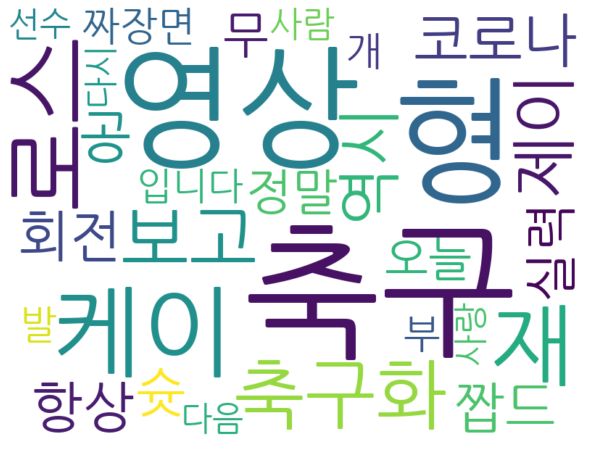

JK ÏïÑÌä∏ÏÇ¨Ïª§ Ïò®ÎùºÏù∏word cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : Minsoo Go
2020. 6. 5.
2020. 6. 4.
2020. 6. 1.
2020. 5. 29.
2020. 5. 26.
2020. 5. 22.
2020. 5. 21.
2020. 5. 19.
2020. 5. 18.
2020. 5. 15.
2020. 5. 14.
2020. 5. 12.
2020. 5. 11.
2020. 5. 8.
2020. 5. 7.
2020. 5. 5.
2020. 5. 1.
2020. 4. 30.
2020. 4. 28.
2020. 4. 27.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



Minsoo Go date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
Minsoo Gotoken_result Ï†ÄÏû• ÏôÑÎ£å



{'Ïö¥Îèô': 111, 'ÎØºÏàò': 42, 'ÏòÅÏÉÅ': 26, 'Ïò§Îäò': 24, 'Ï¢ãÏïÑÏöî': 13, 'Îã§Ïù¥Ïñ¥Ìä∏': 13, 'Ìï¥': 13, 'Ïå§': 12, 'ÏùºÎã®': 11, 'Í≥†ÎØºÏàò': 11, 'Ï¢ãÏùÄ': 11, 'ÏÉò': 10, 'Í∑ºÏú°': 10, 'ÌïòÎ£®': 10, 'Î≥¥Í≥†': 9, 'Ï≤¥Î†•': 9, 'ÎèôÍ∏∞Î∂ÄÏó¨': 9, 'ÏäµÍ¥Ä': 9, 'ÏöîÏ¶ò': 8, 'Î™∏': 8, 'ÏÑ∏Ìä∏': 8, 'ÏãúÏûë': 8, 'ÌóàÎ≤ÖÏßÄ': 8, 'Ïßë': 8, 'ÏûÖÎãàÎã§': 8, 'ÏΩîÎ°úÎÇò': 8, 'Ïã†Í∞Ñ': 8, 'Ïò®ÎùºÏù∏': 8, 'ÌóàÎ¶¨': 7, 'ÏûàÎäî': 7}


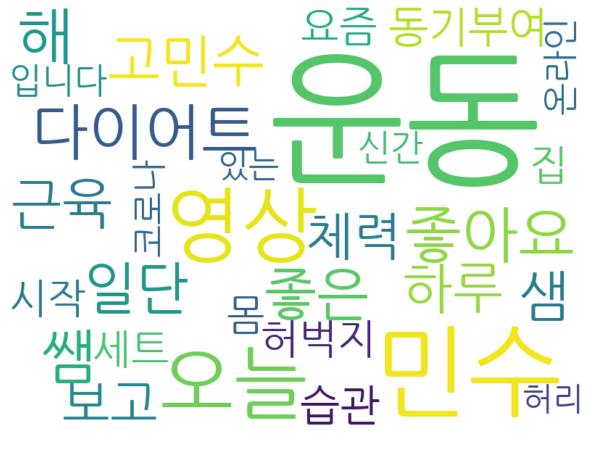

Minsoo Goword cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : ROAD FIGHTING CHAMPIONSHIP
2020. 6. 5.
2020. 6. 4.
2020. 6. 4.
2020. 6. 4.
2020. 6. 3.
2020. 6. 3.
2020. 6. 2.
2020. 6. 2.
2020. 6. 1.
2020. 5. 29.
2020. 5. 28.
2020. 5. 28.
2020. 5. 28.
2020. 5. 27.
2020. 5. 27.
2020. 5. 27.
2020. 5. 26.
2020. 5. 25.
2020. 5. 25.
2020. 5. 25.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



ROAD FIGHTING CHAMPIONSHIP date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
ROAD FIGHTING CHAMPIONSHIPtoken_result Ï†ÄÏû• ÏôÑÎ£å



{'ÎåÄÌëú': 20, 'Ìôç': 18, 'ÏÑ†Ïàò': 17, 'Í≤ΩÍ∏∞': 15, 'Ìï¥ÏÑ§': 14, 'Ïù¥Ìòï': 13, 'Î°úÎìú': 11, 'Í∞ÄÏò§': 11, 'Îßê': 10, 'Ï†ïÎ¨∏': 10, 'ÏÇ¨Îûå': 9, 'ÏûÖÎãàÎã§': 8, 'Î¨¥ÎÜç': 8, 'Î£∞': 7, 'Í∑∏ÎÉ•': 7, 'Í≤©Ìà¨Í∏∞': 7, 'Îèà': 6, 'Ï†ïÎßê': 6, 'Ï£ºÎ®π': 5, 'Í∞ÄÎìú': 5, 'ÏûêÍæ∏': 5, 'Î¶¨': 5, 'Ï†ï': 5, 'Îã®Ï≤¥': 5, 'Î™®Ïäµ': 4, 'Ïã∏ÏõÄ': 4, 'ÎùºÏö¥Îìú': 4, 'Ïä§ÌÉÄÏùº': 4, 'ÌòïÎãò': 4, 'Ï†úÎåÄÎ°ú': 4}


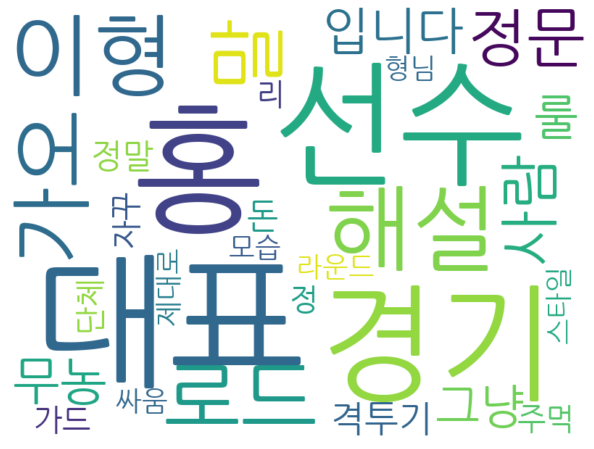

ROAD FIGHTING CHAMPIONSHIPword cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : Shoot for Love ÏäõÌè¨Îü¨Î∏å
2020. 6. 3.
2020. 5. 31.
2020. 5. 29.
2020. 5. 26.
2020. 5. 22.
2020. 5. 19.
2020. 5. 15.
2020. 5. 13.
2020. 5. 10.
2020. 5. 8.
2020. 5. 7.
2020. 5. 5.
2020. 5. 3.
2020. 4. 29.
2020. 4. 23.
2020. 4. 20.
2020. 4. 18.
2020. 4. 16.
2020. 4. 14.
2020. 4. 11.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



Shoot for Love ÏäõÌè¨Îü¨Î∏å date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
Shoot for Love ÏäõÌè¨Îü¨Î∏åtoken_result Ï†ÄÏû• ÏôÑÎ£å



{'Îü¨Î∏å': 246, 'ÏäõÌè¨': 240, 'ÏÑ†Ïàò': 225, 'Ï∂ïÍµ¨': 144, 'ÏòÅÏÉÅ': 133, 'Í≥®ÌîÑ': 121, 'Ï†ïÎßê': 106, 'ÏõêÌù¨': 98, 'Ìëú': 98, 'ÎàÑÎÇò': 92, 'Ïª®ÌÖêÏ∏†': 77, 'Í∞êÎèÖ': 75, 'Î†àÏ†ÑÎìú': 74, 'ÌôîÏù¥ÌåÖ': 70, 'Ï°∞ÏõêÌù¨': 70, 'Í∞ú': 68, 'Ï¢ãÏùÄ': 66, 'ÏùëÏõê': 65, 'ÏïÑÏù¥': 64, 'Î≥¥Í≥†': 63, 'Î•òÏßÑ': 63, 'Ïù¥Ï†ú': 61, 'ÏãúÏ¶å': 61, 'Ïù¥ÏòÅÌëú': 59, 'Íµ¨ÎèÖ': 57, 'Î∞ïÏù∏ÎπÑ': 55, 'Ïï†': 52, 'ÏïÑÎãà': 51, 'Î∞îÎ∞§Î∞î': 51, 'Ïó≠Ïãú': 51}


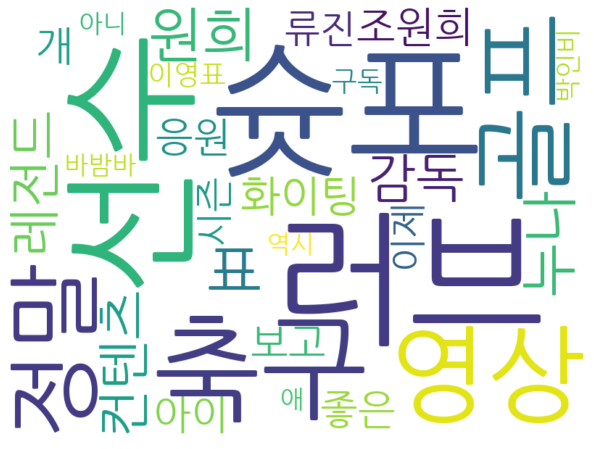

Shoot for Love ÏäõÌè¨Îü¨Î∏åword cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : SomiFit
2020. 6. 4.
2020. 6. 1.
2020. 5. 22.
2020. 5. 16.
2020. 5. 15.
2020. 5. 14.
2020. 5. 11.
2020. 5. 9.
2020. 5. 6.
2020. 5. 4.
2020. 5. 2.
2020. 4. 30.
2020. 4. 17.
2020. 4. 13.
2020. 4. 11.
2020. 4. 10.
2020. 4. 9.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16



SomiFit date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
SomiFittoken_result Ï†ÄÏû• ÏôÑÎ£å



{'Ïö¥Îèô': 533, 'ÏòÅÏÉÅ': 289, 'ÎØ∏': 132, 'Ïò§Îäò': 96, 'Ï¢ãÏïÑÏöî': 93, 'ÏΩîÎ°úÎÇò': 86, 'ÏõêÎãò': 69, 'ÎØ∏ÏÑú': 68, 'Ï¢ãÏùÄ': 67, 'ÎïÄ': 65, 'Ìï≠ÏÉÅ': 60, 'Í∞ôÏïÑÏöî': 58, 'Ï†ïÎßê': 56, 'Îç§Î≤®': 53, 'Î≥¥Í≥†': 52, 'Ïå§': 49, 'ÏûêÍ∑π': 49, 'ÏûÖÎãàÎã§': 49, 'ÏûàÏñ¥Ïöî': 49, 'ÌïòÏ≤¥': 44, 'Î∞îÏù¥Îü¨Ïä§': 44, 'Ïñ∏Îãà': 43, 'Îß§Ïùº': 43, 'ÏóâÎç©Ïù¥': 42, 'ÎèôÏûë': 41, 'ÏÑ∏Ìä∏': 41, 'ÏµúÍ≥†': 38, 'ÏãúÏûë': 37, 'ÏÑ†ÏÉùÎãò': 36, 'Ìö®Í≥º': 36}


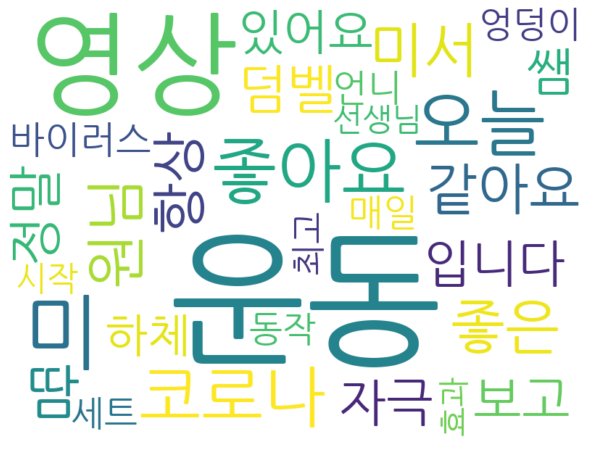

SomiFitword cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : Í∞ïÌïòÎÇòÏä§Ìä∏Î†àÏπ≠
2020. 6. 4.
2020. 6. 1.
2020. 5. 28.
2020. 5. 26.
2020. 5. 21.
2020. 5. 18.
2020. 5. 14.
2020. 5. 11.
2020. 5. 7.
2020. 5. 4.
2020. 4. 27.
2020. 4. 23.
2020. 4. 20.
2020. 4. 16.
2020. 4. 13.
2020. 4. 9.
2020. 4. 6.
2020. 4. 2.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17



Í∞ïÌïòÎÇòÏä§Ìä∏Î†àÏπ≠ date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
Í∞ïÌïòÎÇòÏä§Ìä∏Î†àÏπ≠token_result Ï†ÄÏû• ÏôÑÎ£å



{'Ïö¥Îèô': 423, 'ÏòÅÏÉÅ': 248, 'Ïå§': 246, 'ÏÑ†ÏÉùÎãò': 167, 'Ïä§Ìä∏Î†àÏπ≠': 164, 'ÌïòÎÇò': 151, 'Ïò§Îäò': 137, 'Îã§Î¶¨': 100, 'Ï¢ãÏïÑÏöî': 100, 'ÎèôÏûë': 96, 'ÌóàÎ≤ÖÏßÄ': 88, 'ÏãúÏûë': 84, 'Îß§Ïùº': 78, 'Ï†ïÎßê': 78, 'Í∑ºÏú°': 68, 'Ìï≠ÏÉÅ': 66, 'Ï¢ãÏùÄ': 64, 'ÏûêÏÑ∏': 63, 'Í∞ïÌïòÎÇò': 62, 'Î™∏': 61, 'ÌóàÎ¶¨': 57, 'Í∞ôÏïÑÏöî': 54, 'ÌïòÏ≤¥': 54, 'Î¨¥Î¶é': 53, 'ÏûêÍ∑π': 52, 'ÎäêÎÇå': 48, 'Ìûò': 48, 'Íæ∏Ï§ÄÌûà': 48, 'ÎïÄ': 46, 'Ìö®Í≥º': 46}


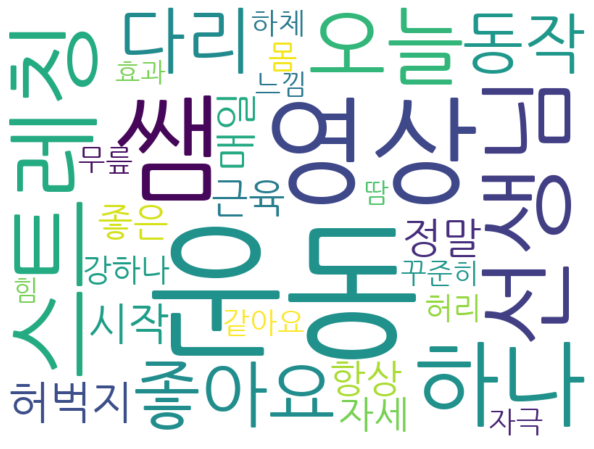

Í∞ïÌïòÎÇòÏä§Ìä∏Î†àÏπ≠word cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : ÍΩÅÎ≥ëÏßÄtv
2020. 6. 5.
2020. 6. 5.
2020. 6. 4.
2020. 6. 2.
2020. 6. 1.
2020. 5. 24.
2020. 5. 22.
2020. 5. 21.
2020. 5. 20.
2020. 5. 19.
2020. 5. 16.
2020. 5. 15.
2020. 5. 14.
2020. 5. 13.
2020. 5. 13.
2020. 5. 12.
2020. 5. 11.
2020. 5. 8.
2020. 5. 7.
2020. 5. 7.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



ÍΩÅÎ≥ëÏßÄtv date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
ÍΩÅÎ≥ëÏßÄtvtoken_result Ï†ÄÏû• ÏôÑÎ£å



{'ÏÑ†Ïàò': 470, 'Ïù¥Í∞ïÏù∏': 156, 'Î≥ëÏßÄ': 142, 'ÏúÑ': 141, 'ÌåÄ': 126, 'Í∞êÎèÖ': 126, 'Ïø†Î≥¥': 105, 'ÌòïÎãò': 102, 'ÍπÄÎ≥ëÏßÄ': 99, 'ÏÉùÍ∞Å': 93, 'Î¶¨Í∑∏': 91, 'Ï∂ïÍµ¨': 85, 'ÌòïÏª¥': 80, 'Î¨¥Î¶¨Îâ¥': 80, 'ÏÜêÌù•ÎØº': 79, 'ÏßÄÍ∏à': 70, 'Í≤ΩÍ∏∞': 63, 'Í≥®ÌÇ§Ìçº': 62, 'ÌïúÍµ≠': 59, 'ÏÇ¨Îûå': 58, 'ÏµúÍ≥†': 54, 'Îßê': 54, 'Ïö∞Ïäπ': 54, 'Ìé©': 54, 'Í≥®': 53, 'ÏàòÎπÑ': 53, 'ÎπÑÍµê': 52, 'Í∑∏ÎÉ•': 51, 'ÏûàÎäî': 51, 'Ï¢ãÏùÄ': 49}


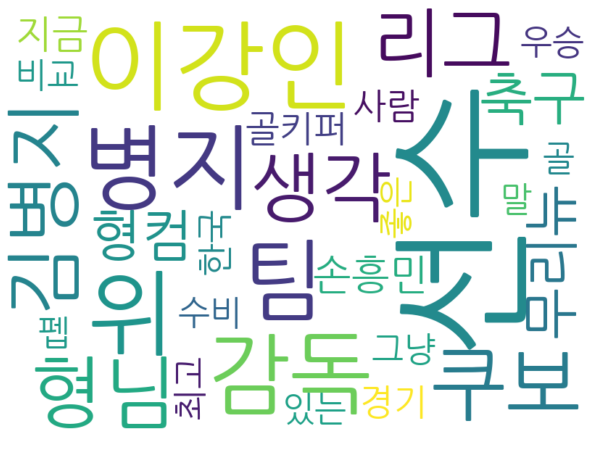

ÍΩÅÎ≥ëÏßÄtvword cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : ÎßêÏôïTV
2020. 6. 2.
2020. 5. 30.
2020. 5. 29.
2020. 5. 26.
2020. 5. 25.
2020. 5. 23.
2020. 5. 20.
2020. 5. 19.
2020. 5. 17.
2020. 5. 15.
2020. 5. 12.
2020. 5. 7.
2020. 5. 4.
2020. 5. 1.
2020. 4. 27.
2020. 4. 25.
2020. 4. 21.
2020. 4. 19.
2020. 4. 15.
2020. 4. 12.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



ÎßêÏôïTV date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
ÎßêÏôïTVtoken_result Ï†ÄÏû• ÏôÑÎ£å



{'Ìòï': 427, 'Îßê': 339, 'Ïö¥Îèô': 307, 'ÏòÅÏÉÅ': 280, 'ÎßêÏôï': 166, 'Ïò§Îäò': 85, 'Î≥¥Í≥†': 75, 'ÌòïÎãò': 74, 'ÏôïÌòï': 68, 'Ïó¨Ïûê': 65, 'Í∞ú': 64, 'Î®∏Î¶¨': 64, 'ÏõÉÍ∏∞': 57, 'Ïó≠Ïãú': 56, 'Ïó¨Í∏∞': 55, 'Ïç∏ÎÑ§Ïùº': 54, 'Í∏∏Ïù¥': 53, 'Ïß±': 51, 'Ïù¥Ìòï': 50, 'Ï∏°Ï†ï': 50, 'ÎØºÍµê': 48, 'ÏïÑÎãà': 48, 'Î™∏': 47, 'Ïª¨': 45, 'ÏÇ¨Îûå': 44, 'Ïñ∏Ï†ú': 44, 'ÎÖ∏Îûò': 43, 'Î≤§Ïπò': 42, 'ÎÇ®Ïûê': 39, 'Ïó¨ÏÑ±': 39}


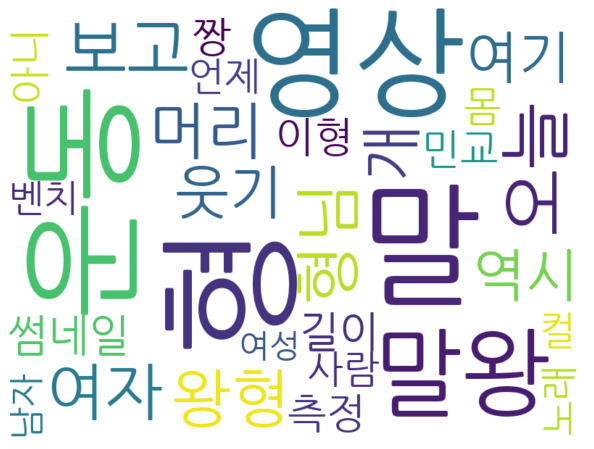

ÎßêÏôïTVword cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : Î∞ïÎ¨∏ÏÑ± Îã¨ÏàòÎÑ§ÎùºÏù¥Î∏å
2020. 6. 6.
2020. 6. 5.
2020. 6. 5.
2020. 6. 4.
2020. 6. 4.
2020. 6. 4.
2020. 6. 3.
2020. 6. 3.
2020. 6. 3.
2020. 6. 1.
2020. 6. 1.
2020. 5. 31.
2020. 5. 29.
2020. 5. 29.
2020. 5. 29.
2020. 5. 28.
2020. 5. 28.
2020. 5. 27.
2020. 5. 26.
2020. 5. 26.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



Î∞ïÎ¨∏ÏÑ± Îã¨ÏàòÎÑ§ÎùºÏù¥Î∏å date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
Î∞ïÎ¨∏ÏÑ± Îã¨ÏàòÎÑ§ÎùºÏù¥Î∏åtoken_result Ï†ÄÏû• ÏôÑÎ£å



{'ÏÑ†Ïàò': 122, 'ÌÜ†Ìä∏ÎÑò': 72, 'Ï∂ïÍµ¨': 60, 'Îß®Ïú†': 60, 'Í≤ΩÍ∏∞': 58, 'Î¶¨Í∑∏': 51, 'ÏòÅÏÉÅ': 49, 'ÏÜêÌù•ÎØº': 48, 'ÌåÄ': 48, 'Î≤å': 47, 'Ï±îÏä§': 44, 'ÏÉùÍ∞Å': 43, 'Îâ¥Ï∫êÏä¨': 41, 'ÏóÖ': 40, 'Ìå¨': 38, 'ÏàòÎπÑ': 36, 'Ïäπ': 35, 'Î¶¨Î≤ÑÌíÄ': 34, 'Î≤†Î•¥ÎÑà': 31, 'Î∂ÄÏÉÅ': 30, 'Ï≤ºÏãú': 28, 'Î∞ïÎ¨∏ÏÑ±': 28, 'ÏãúÏ¶å': 28, 'Ïù¥Í∞ïÏù∏': 28, 'Ï¢ãÏùÄ': 27, 'Îßê': 27, 'ÏßÄÍ∏à': 27, 'Ï†úÎ∞ú': 27, 'Ïö∞Ïäπ': 27, 'ÏΩîÎ°úÎÇò': 26}


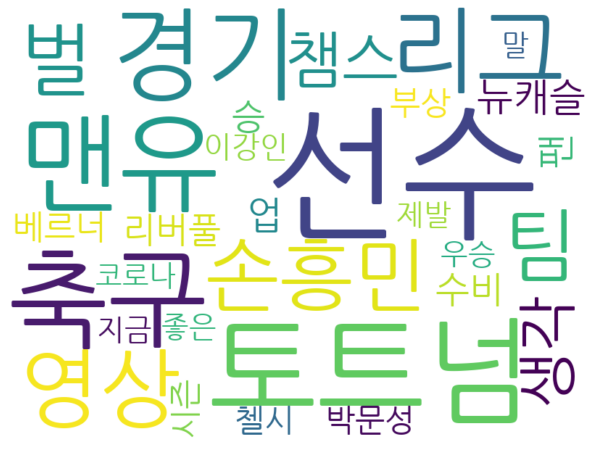

Î∞ïÎ¨∏ÏÑ± Îã¨ÏàòÎÑ§ÎùºÏù¥Î∏åword cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : ÏÑùÍæ∏Ï∂ïÍæ∏
2020. 4. 4.
2020. 4. 1.
0
1



ÏÑùÍæ∏Ï∂ïÍæ∏ date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
ÏÑùÍæ∏Ï∂ïÍæ∏token_result Ï†ÄÏû• ÏôÑÎ£å



{'ÏÑù': 42, 'Ï∂ïÍµ¨': 40, 'Íæ∏': 40, 'Íµ¨ÎèÖ': 40, 'Ïù¥Î¶Ñ': 37, 'ÌîÑÏÇ¨': 21, 'ÏòÅÏÉÅ': 17, 'ÎèÖÏûê': 17, 'Ï∂ï': 12, 'Îã§Ïùå': 12, 'Ïßë': 10, 'ÏÇ¨Îûå': 9, 'ÎÇú': 9, 'Ï¢ãÏïÑÏöî': 9, 'Ìòï': 8, 'ÌôîÏù¥ÌåÖ': 8, 'Ïò§ÎûòÎêú': 8, 'ÌîÑÎ°úÌïÑ': 7, 'ÌïúÏßÄ': 7, 'ÏÉùÍ∞Å': 6, 'Î∞∞Í∑∏': 6, 'Î≥¥Í≥†': 6, 'ÏÇ¨Îûë': 6, 'Î≥¥Í∏∞': 6, 'Ìï≠ÏÉÅ': 6, 'Ïò§Îäò': 5, 'ÌïòÎ£®': 5, 'Ï¢ÖÏùº': 5, 'ÏïÑÌä∏': 5, 'ÏùëÏõê': 5}


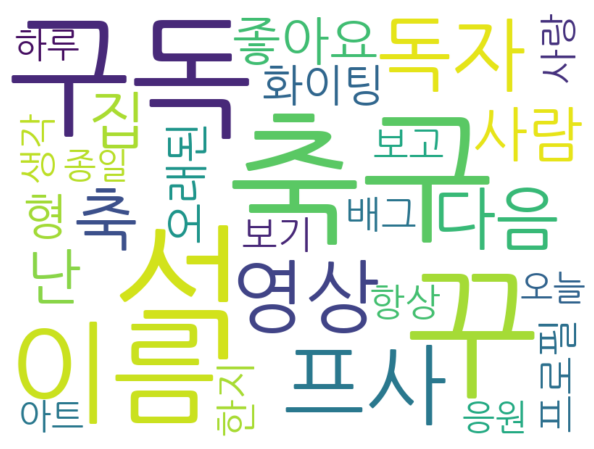

ÏÑùÍæ∏Ï∂ïÍæ∏word cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : Ïù¥Ïä§ÌÉÄTV
2020. 6. 6.
2020. 6. 6.
2020. 6. 6.
2020. 6. 5.
2020. 6. 5.
2020. 6. 5.
2020. 6. 5.
2020. 6. 4.
2020. 6. 4.
2020. 6. 4.
2020. 6. 4.
2020. 6. 3.
2020. 6. 3.
2020. 6. 3.
2020. 6. 3.
2020. 6. 2.
2020. 6. 2.
2020. 6. 2.
2020. 6. 2.
2020. 6. 2.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



Ïù¥Ïä§ÌÉÄTV date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
Ïù¥Ïä§ÌÉÄTVtoken_result Ï†ÄÏû• ÏôÑÎ£å



{'Ï∂î': 180, 'ÏòÅÏÉÅ': 166, 'Î≤àÍ∞ú': 145, 'Ìòï': 137, 'ÏÑ†Ïàò': 131, 'Ïä§ÌÉÄ': 105, 'Î¶¨Î≤ÑÌíÄ': 103, 'Îß®Ïú†': 101, 'ÏÉùÍ∞Å': 92, 'Ïù¥Ìòï': 85, 'Ïª®ÌÖêÏ∏†': 79, 'Ï¢ÖÏú§': 74, 'Ìå¨': 74, 'Ï≤ºÏãú': 72, 'Î≥¥Í≥†': 70, 'Î≥º': 69, 'Îßê': 69, 'Îß®': 65, 'ÏΩîÎπÑ': 65, 'ÌåÄ': 62, 'Í∞ú': 61, 'Ï∂ïÍµ¨': 58, 'ÏÇ¨Îûå': 57, 'ÏãúÏ¶å': 54, 'Ïù¥ÎãàÏóêÏä§ÌÉÄ': 54, 'Ïö∞Î®º': 52, 'Ïò§Îäò': 52, 'Î≤†Î•¥ÎÑà': 51, 'Ï†ÑÎ≤î': 48, 'Ïø†Ìã∞Îâ¥': 45}


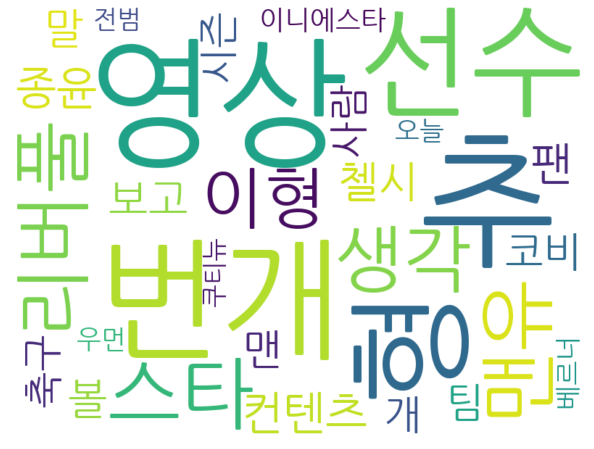

Ïù¥Ïä§ÌÉÄTVword cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : Ïû¨ÎØ∏Ïñ¥Ìä∏
2020. 6. 4.
2020. 6. 2.
2020. 5. 28.
2020. 5. 19.
2020. 5. 17.
2020. 5. 12.
2020. 5. 7.
2020. 5. 5.
2020. 4. 30.
2020. 4. 29.
2020. 4. 28.
2020. 4. 23.
2020. 4. 21.
2020. 4. 13.
2020. 4. 2.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14



Ïû¨ÎØ∏Ïñ¥Ìä∏ date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
Ïû¨ÎØ∏Ïñ¥Ìä∏token_result Ï†ÄÏû• ÏôÑÎ£å



{'Ïö¥Îèô': 153, 'Ìòï': 120, 'ÌûòÏΩ©': 98, 'ÏòÅÏÉÅ': 64, 'ÏûÖÎãàÎã§': 39, 'Î™∏': 36, 'ÌïòÏ≤¥': 34, 'ÏãúÏûë': 34, 'ÌòïÎãò': 28, 'ÌÇ§': 28, 'Î≥¥Í≥†': 28, 'Í∞ú': 25, 'ÏÉùÍ∞Å': 25, 'ÏÇ¥': 24, 'ÏÇ¨Îûå': 24, 'Îã§Ïù¥Ïñ¥Ìä∏': 24, 'Îßê': 22, 'ÏäµÍ¥Ä': 22, 'Ï¢ãÏùÄ': 22, 'Ïû¨ÎØ∏': 21, 'Ïò§Îäò': 21, 'ÏßÄÍ∏à': 21, 'Ï†ïÎßê': 21, 'Ï≤¥': 20, 'Î™∏Î¨¥Í≤å': 19, 'Ïã†Ï≤≠': 19, 'Ìä∏': 19, 'Í∞ÄÏä¥': 18, 'Ï†ïÎèÑ': 17, 'Îã§Ïö¥': 17}


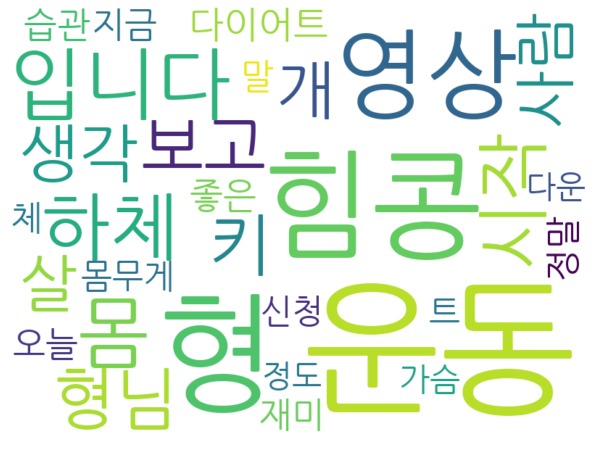

Ïû¨ÎØ∏Ïñ¥Ìä∏word cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : Ï∞®ÎèÑÎ•¥
2020. 5. 23.
2020. 5. 22.
2020. 5. 21.
2020. 5. 20.
2020. 5. 19.
2020. 5. 17.
2020. 5. 16.
2020. 5. 15.
2020. 5. 14.
2020. 5. 13.
2020. 5. 13.
0
1
2
3
4
5
6
7
8
9
10



Ï∞®ÎèÑÎ•¥ date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
Ï∞®ÎèÑÎ•¥token_result Ï†ÄÏû• ÏôÑÎ£å



{'ÎîîÏïÑÏ¶à': 64, 'ÏÑ†Ïàò': 64, 'Í≤ΩÍ∏∞': 51, 'Ï∞®ÎèÑÎ•¥': 34, 'ÎßàÏä§': 29, 'Îãâ': 28, 'Ìä∏': 27, 'ÏòÅÏÉÅ': 26, 'ÎπÑÎã¨': 26, 'Í≤©Ìà¨Í∏∞': 25, 'ÌòïÏ†ú': 25, 'ÏÇ¨Îûå': 19, 'ÏïÑÎÜÄÎìú': 19, 'ÏïΩÎ¨º': 18, 'Îßê': 17, 'Ïã∏ÏõÄ': 16, 'ÏÉÅÎÇ®Ïûê': 15, 'Î≥¥Í≥†': 15, 'Í∑∏ÎÉ•': 15, 'Ï±ÑÎÑê': 15, 'ÎåÄÎßàÏ¥à': 15, 'ÏµúÍ≥†': 14, 'Ï†ïÎèÑ': 14, 'Î™®Ïäµ': 14, 'ÏïÖÎèô': 14, 'Ìòï': 14, 'ÏùëÏõê': 14, 'ÏûÑ': 13, 'ÏûÖÎãàÎã§': 13, 'ÌÇ§': 13}


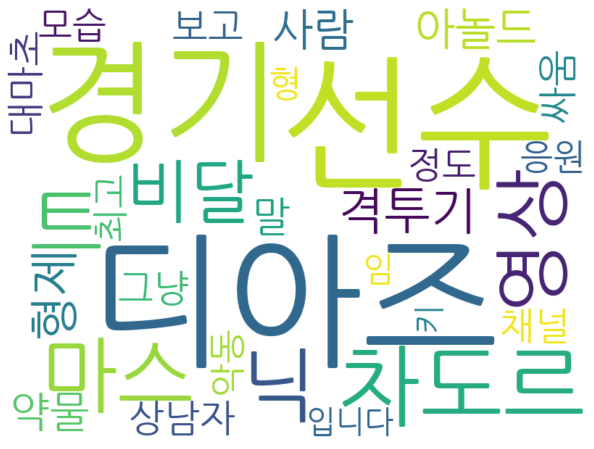

Ï∞®ÎèÑÎ•¥word cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : ÌîºÏßÄÏª¨Í∞§Îü¨Î¶¨
2020. 6. 2.
2020. 6. 1.
2020. 5. 29.
2020. 5. 28.
2020. 5. 26.
2020. 5. 25.
2020. 5. 23.
2020. 5. 21.
2020. 5. 19.
2020. 5. 15.
2020. 5. 14.
2020. 5. 12.
2020. 5. 8.
2020. 5. 5.
2020. 5. 1.
2020. 4. 30.
2020. 4. 28.
2020. 4. 24.
2020. 4. 23.
2020. 4. 21.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



ÌîºÏßÄÏª¨Í∞§Îü¨Î¶¨ date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
ÌîºÏßÄÏª¨Í∞§Îü¨Î¶¨token_result Ï†ÄÏû• ÏôÑÎ£å



{'Í≥ÑÎûÄ': 411, 'Ìòï': 266, 'Ïö¥Îèô': 216, 'ÌòÅÏ§Ä': 203, 'ÏòÅÏÉÅ': 197, 'Îπ°Îπ°Ïù¥': 154, 'Îü∞ÎãùÎß®': 142, 'Î≥¥Í≥†': 114, 'Ïò§Îäò': 111, 'ÌóåÌòà': 108, 'ÏÇ¨Îûå': 106, 'ÍπÄ': 103, 'ÎßàÏä§ÌÅ¨': 86, 'ÏïÑÏ†ÄÏî®': 85, 'Í∞ú': 83, 'Ï†ïÎßê': 71, 'Ïª¨': 68, 'ÎßàÏÇ¨ÏßÄ': 68, 'ÌîºÏßÄ': 66, 'ÏôÄÏö∞': 66, 'Ï¢ãÏùÄ': 62, 'ÌòïÎãò': 61, 'Î®∏Î¶¨': 59, 'Í≥µÌòÅÏ§Ä': 57, 'Ïç∏ÎÑ§Ïùº': 55, 'ÏπúÍµ¨': 53, 'ÌòÅÏ§ÄÎãò': 52, 'Í∞§Îü¨Î¶¨': 51, 'ÏÉùÍ∞Å': 51, 'ÏïÑÎãà': 50}


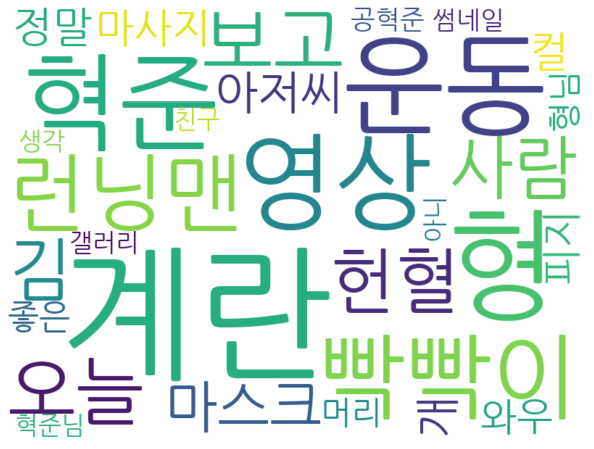

ÌîºÏßÄÏª¨Í∞§Îü¨Î¶¨word cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : ÌùëÏûêÌó¨Ïä§SurplusHealth
2020. 6. 1.
2020. 5. 28.
2020. 5. 17.
2020. 5. 15.
2020. 5. 13.
2020. 5. 11.
2020. 5. 9.
2020. 5. 7.
2020. 5. 6.
2020. 4. 30.
2020. 4. 29.
2020. 4. 27.
2020. 4. 24.
2020. 4. 21.
2020. 4. 18.
2020. 4. 16.
2020. 4. 14.
2020. 4. 13.
2020. 4. 11.
2020. 4. 10.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



ÌùëÏûêÌó¨Ïä§SurplusHealth date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
ÌùëÏûêÌó¨Ïä§SurplusHealthtoken_result Ï†ÄÏû• ÏôÑÎ£å



{'Ìòï': 399, 'ÌùëÏûê': 350, 'ÏòÅÏÉÅ': 281, 'Ïö¥Îèô': 275, 'ÏÇ¨Îûå': 177, 'Îßê': 148, 'Î™∏': 111, 'Í∞ú': 105, 'Î≥¥Í≥†': 100, 'ÌòïÎãò': 89, 'ÏÑ†Ïàò': 86, 'ÏÉùÍ∞Å': 80, 'Ïò§Îäò': 74, 'Ìó¨Ïä§': 74, 'ÏûÖÎãàÎã§': 73, 'ÏõÉÍ∏∞': 72, 'Ï§ëÎüâ': 66, 'Ïç∏ÎÑ§Ïùº': 65, 'ÎåÄÎãà': 62, 'Ï¢ãÏùÄ': 60, 'Ïó¨Ïûê': 60, 'ÏñºÍµ¥': 60, 'Í∑∏ÎÉ•': 56, 'Ï≤¥Ïú°': 56, 'ÏûÑ': 56, 'ÎßàÏßÄÎßâ': 56, 'Ï°¥ÎÇò': 53, 'Í∑ºÏú°': 52, 'ÎåìÍ∏Ä': 51, 'ÏïÑÎãà': 51}


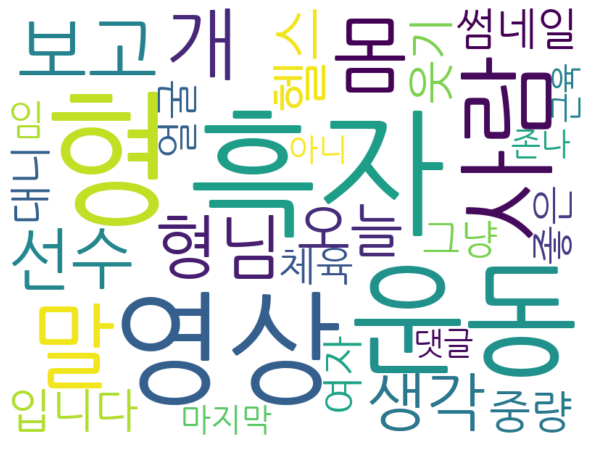

ÌùëÏûêÌó¨Ïä§SurplusHealthword cloud Ï†ÄÏû• ÏôÑÎ£å
ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : ÌûôÏúºÎú∏
2020. 5. 8.
2020. 5. 7.
2020. 5. 4.
2020. 5. 1.
2020. 4. 29.
2020. 4. 28.
2020. 4. 23.
2020. 4. 21.
2020. 4. 17.
2020. 4. 17.
2020. 4. 14.
0
1
2
3
4
5
6
7
8
9
10



ÌûôÏúºÎú∏ date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å
ÌûôÏúºÎú∏token_result Ï†ÄÏû• ÏôÑÎ£å



{'ÏúºÎú∏': 328, 'Ïö¥Îèô': 211, 'ÏòÅÏÉÅ': 143, 'Í≥ÑÎûÄ': 106, 'Ïñ∏Îãà': 103, 'Ïä§ÏøºÌä∏': 75, 'Ïò§Îäò': 67, 'Í∞ú': 53, 'Í∞ôÏïÑÏöî': 53, 'Ïã¨': 51, 'Ìûô': 49, 'ÏÑ∏Ìä∏': 48, 'Î≥¥Í≥†': 44, 'Ï¢ãÏïÑÏöî': 42, 'Ï†ïÎßê': 41, 'Î∞îÌÉÄ': 41, 'ÎàÑÎÇò': 39, 'Î™∏Îß§': 38, 'Î≥µÍ∑º': 35, 'ÏµúÍ≥†': 34, 'ÏÇ¨Îûå': 33, 'Î£®Ìã¥': 32, 'Î™∏': 31, 'ÎÇ®ÏÇ∞': 31, 'ÌòÅÏ§Ä': 30, 'Ï¢ãÏùÄ': 29, 'ÎïÄ': 29, 'Ìï≠ÏÉÅ': 28, 'ÍπÄ': 28, 'ÏñºÍµ¥': 27}


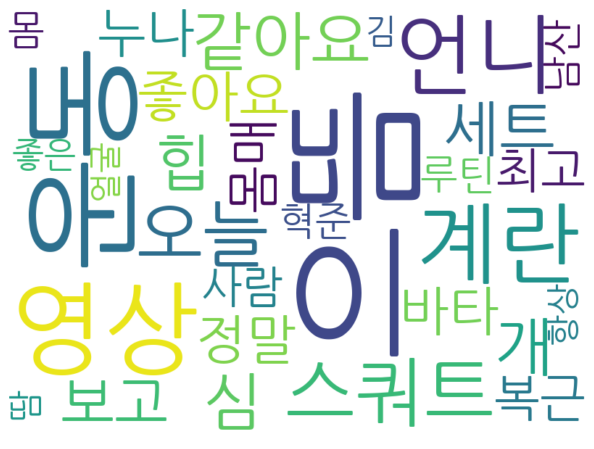

ÌûôÏúºÎú∏word cloud Ï†ÄÏû• ÏôÑÎ£å


In [6]:
# ÌååÏùº Ìï©ÏπòÎäî Í≥≥ (Ìè¥Îçî Ï†úÎ™© ÏûÖÎ†•)
# ÎåìÍ∏ÄÏóê ÎÇ†Ïßú Ï∂îÍ∞Ä!!!
for youtube_channel in name_list:
#     youtube_channel = input("Ïú†Ìà¨Î∏å Ï±ÑÎÑê Ïù¥Î¶Ñ ÏûÖÎ†•ÌïòÏãúÏò§.")
    youtube_channel = youtube_channel
    print("ÌòÑÏû¨ Ïú†ÌäúÎ≤Ñ : " + youtube_channel)
#     if youtube_channel :
#     date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv')
    date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv')
    ccc = date[date['start_date'] >= '2020. 4. 1']['start_date']

    ccc
    # pd.read_csv('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_[i+1].csv')

    for i in ccc:
         print(i)
    #     a = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))['youtube'].values
    #     np.append(comment_date, a)     up_date = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
    #     comment_date.append(up_date)
    comment_date = []
    for i in range(len(ccc)):
        print(i)
        a = pd.read_csv((youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
        comment_date.append(a)

#     comment_date[0]
    for i in tqdm_notebook(range(len(ccc))):

        df = comment_date[i]
        you_id = df['youtube_id'].values
        co_id = df['comment'].values
        likes = df['like_num'].values
        start_date = ccc[i]
        comment_final = pd.DataFrame(data = {'ÎãâÎÑ§ÏûÑ':you_id,
                                    'ÎåìÍ∏Ä':co_id,
                                    'Ï¢ãÏïÑÏöîÏàò':likes,
                                    'ÎÇ†Ïßú':start_date})
        comment_final.to_csv(youtube_channel+'/comment/'+ youtube_channel +'_comment_date{}.csv'.format(i+1),
                            encoding='utf-8-sig',index=False)    

    print(youtube_channel + ' date Ïª¨Îüº Ï∂îÍ∞Ä ÏôÑÎ£å')

    path =  str(youtube_channel) + "/comment"
    path2 = str(youtube_channel) + '/result.csv'
    arg_youtube = str(youtube_channel) + "*"


    allFile_list = glob.glob(os.path.join(path,arg_youtube))
    #print(allFile_list)
    allData = []
    for file in allFile_list:
        if 'date' in file:
            # print(file)
            df = pd.read_csv(file)
            allData.append(df)

    dataCombine = pd.concat(allData,axis =0, ignore_index = True)

    dataCombine.to_csv(path2, index = False, encoding = 'utf-8-sig')
    cdPath = str(youtube_channel) + '/result.csv'
    comment_data = pd.read_csv(cdPath)
    comment_data ##Ï†úÎåÄÎ°ú Ï∂úÎ†•ÎêòÎäîÏßÄ ÌôïÏù∏
    com_list = list(comment_data['ÎåìÍ∏Ä'])   ##Ï†úÎåÄÎ°ú Ï∂úÎ†•ÎêòÎäîÏßÄ ÌôïÏù∏
    # com_list   ##Ï†úÎåÄÎ°ú Ï∂úÎ†•ÎêòÎäîÏßÄ ÌôïÏù∏

    # ### Ï∂îÏ∂úÎêú Îã®Ïñ¥Í∞Ä Î¨¥Ïä® ÌòïÌÉúÏù∏ÏßÄ ÌååÏïÖ
    # # for sentence in com_list:
    # #     morph = twitter.pos(sentence)
    # #     sentences_tag.append(morph)

    # Ï∂îÏ∂ú Îã®Ïñ¥Îì§ Ï†ÄÏû•

    def get_noun(comment_txt):

        twitter = Twitter()
        noun_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Noun']:

                    if word not in stop_words:
                        noun_list.append(word)

        return noun_list

    def get_adj(comment_txt):

        twitter = Twitter()
        adj_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Adjective']:
                    if word not in stop_words:
                        adj_list.append(word)

        return adj_list

    def get_verb(comment_txt):

        twitter = Twitter()
        verb_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Verb']:
                    if word not in stop_words:
                        verb_list.append(word)
        return verb_list

    comment_list = []
    for i in range(len(comment_data)):
        comment_list.append(comment_data['ÎåìÍ∏Ä'].iloc[i])

    comment_result = []

    for i in comment_list:
        comment_result.append(i)

    comment_result = pd.DataFrame(comment_result, columns=["comment"])

    #cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # Ìï¥ÎãπÌè¥ÎçîÏóê ÏûêÎèôÏ†ÄÏû•
    comment_result['noun'] = comment_result['comment'].apply(lambda x: get_noun(x))
    comment_result['adj'] = comment_result['comment'].apply(lambda x: get_adj(x))
    comment_result['verb'] = comment_result['comment'].apply(lambda x: get_verb(x))

    comment_result.to_csv(youtube_channel +'/{}token_result.csv'.format(youtube_channel),
                                                                       index = False, encoding = 'utf-8-sig')
    print(youtube_channel + 'token_result Ï†ÄÏû• ÏôÑÎ£å')

    twitter = Twitter()

    sentences_tag = []
    for sentence in tqdm_notebook(com_list):
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)

    stop_words
    for sentence in comment_data:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
    #     print(morph)
    #     print('-'*30)

    # print(sentences_tag)
    # print(len(sentences_tag))
    # print('\n'*3)

    noun_adj_list = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun','Adjective','verb']:
                if word not in stop_words:
                    noun_adj_list.append(word)            

    counts = Counter(noun_adj_list)
    select_data = counts.most_common(30)


    wc = WordCloud(font_path='NanumGothic.ttf',max_font_size=200,background_color='white' ,width=800, height=600)

    print(dict(select_data))
    cloud = wc.generate_from_frequencies(dict(select_data))
    plt.figure(figsize=(12, 8))
    plt.axis('off')
    plt.imshow(cloud,interpolation='bilinear')
    plt.show()
    cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # Ìï¥ÎãπÌè¥ÎçîÏóê ÏûêÎèôÏ†ÄÏû•
    
    print(youtube_channel + 'word cloud Ï†ÄÏû• ÏôÑÎ£å')

In [10]:
## ÎåìÍ∏Ä ÌååÏùºÏù¥ ÏûàÎäî Ïú†ÌäúÎ≤ÑÎßå ÎßåÎì§Ïñ¥Ï£ºÏÑ∏Ïöî.
df = pd.read_csv('Ïä§Ìè¨Ï∏†Î¶¨Ïä§Ìä∏.csv',encoding='cp949')
name_list = df['Ïù¥Î¶Ñ'].values
name_list

All_file = []
for name in name_list:
# Í∞Å Ïù¥Î¶ÑÏóê ÎßûÎäî info ÌååÏùº Î∂àÎü¨ÏôÄÏÑú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï†ÄÏû•
    df = pd.read_csv(f'{name}/{name}token_result.csv')
    #df = pd.read_csv(f'C:\\Users\\acorn\\mywork\\pythonwork\\Ìë∏Îìú\\{name}token_result.csv')
    All_file.append(df)
    
    dataCombine = pd.concat(All_file,axis =0, ignore_index = True)

    dataCombine.to_csv('testword.csv', index = False)

In [12]:
aaa= pd.read_csv('testword.csv')
aaa

comment  \
0      üí•ÎåìÍ∏Ä Ïù¥Î≤§Ìä∏üí•\r\nÎåìÍ∏ÄÏùÑ Îã¨ÏïÑÏ£ºÏã† Î∂ÑÎì§ Ï§ë Ï∂îÏ≤®ÏùÑ ÌÜµÌï¥ Ìïú Î∂ÑÏóêÍ≤å Í≥†ÏïåÎ†à 7Î∂ÄÌå¨...   
1      1.Í≥µÏùÑ Ïûò Î∞ÄÏñ¥ÎÜìÍ∏∞\n2.ÎîîÎî§Î∞úÏùò ÏúÑÏπò\n3.ÏûÑÌå©Ìä∏ Îïå ÏãúÏÑ†\n4.ÏäàÌåÖ ÌõÑ Î™∏Ïù¥ ...   
2      Ï†ÄÎèÑ ÏäàÌåÖÏ§ëÏóê Í∞êÏïÑÏ∞®Í∏∞Î•º Ï†úÏùº Ï¢ãÏïÑÌïòÍ≥† Ïûò Ïì∞ÎäîÎç∞ ÌûòÏù¥ ÏïàÏì∏Î†§ÏÑú Í≥†ÎØºÏù¥ ÎßéÏïòÎäîÎç∞ Ïù¥...   
3      Í≥†ÏïåÎ†à ÌïòÎ£®ÎèÑ Îπ†ÏßêÏóÜÏù¥ ÏãúÏ≤≠Ìï©ÎãàÎã§.\nÏïÑÎßàÏ∂îÏñ¥ Ï∂ïÍµ¨Ïù∏Îì§Ïùò Í∏∏ÎùºÏû°Ïù¥ÎùºÌï†ÍπåÏöî?\nÍ≥†ÏïåÎ†à...   
4                               Í≥†Ï≤¥Ìã∞ÎÖ∏Í∞Ä ÏïåÎ†§Ï£ºÎãàÍπå Ïπ¥Ïπ¥pdÍ∞Ä\nÏûòÏ∞®ÎÑ§..   
...                                                  ...   
29836  Í≥ÑÎûÄÌòï ÏΩúÎùºÎ≥¥ ÏûºÎÇòÏöî.\nÌèâÍ∑† ÎÇ®ÏÑ±Ïù¥Î©¥ Î≥¥ÌÜµ Î™á Ï†ïÎèÑÍ∞Ä ÎßûÏùÑÍπåÏöî.\nÏùå....30ÌÇ§...   
29837                                         ÎÇòÎèÑ Îπ°Îπ°Ïù¥ÏïÑÏ†ÄÏî®Ïïº   
29838                ÏåïÏãúÌïú Î†àÍπÖÏä§ÏûÖÏùÄ ÏÇ¨ÎûåÏù¥ Í≥ÑÏÜç ÏΩîÏñ¥Ïóê ÌûòÏ£ºÎùºÎäîÎç∞ ÏΩîÏñ¥Í∞ÄÎ®ºÍ∞ÄÏöî??   
29839  Ïñ∏Ï††Í∞ÄÎ∂ÄÌÑ∞ ÏúºÎú∏Îãò, Í≥ÑÎûÄÌòï, Í≥µÌòÅÏ§Ä ÏÑ∏ ÏÇ¨ÎûåÏù¥ Ìï®Íªò ÎÇòÏò§ÏßÄ ÏïäÏúºÎ©¥ Ïñ¥ÏÉâÌï®. Ïù¥Í≤å ÎàÑ...   
29840  Ï†Ä ÎÇ®ÏûêÏù∏Îç∞Ïöî Ïä§ÏøºÌä∏ Ìï¥ÎèÑ ÎÇ®ÏûêÎäî ÏóâÎç©Ïù¥ ÏïàÏª§ÏßÄÎäî Í±∏Î°ú ÏïåÍ≥†ÏûàÎäîÎç∞ ÎßûÎÇòÏöî? Ïª§ÏßÄÎ©¥ ...   

                                                    noun  \
0      ['ÎåìÍ∏Ä', 'Ïù¥Î≤§Ìä∏', 'ÎåìÍ∏Ä', 'Ï§ë', 'Ï∂îÏ≤®', 'ÌÜµÌï¥', 'ÏïåÎ†à', 'Î∂Ä'...   
1      ['Í≥µ', 'Î∞úÏùò', 'ÏúÑÏπò', 'ÏûÑÌå©Ìä∏', 'ÏãúÏÑ†', 'ÏäàÌåÖ', 'Î™∏', 'Ïó≠Ïãú'...   
2      ['ÏäàÌåÖ', 'Ï∞®Í∏∞', 'Ï†úÏùº', 'Ìûò', 'Í≥†ÎØº', 'ÏòÅÏÉÅ', 'Î≥¥Í≥†', 'Î≤ï',...   
3      ['ÏïåÎ†à', 'ÌïòÎ£®', 'ÏãúÏ≤≠', 'ÏïÑÎßàÏ∂îÏñ¥', 'Ï∂ïÍµ¨Ïù∏', 'Í∏∏ÎùºÏû°Ïù¥', 'ÏïåÎ†à'...   
4                                     ['Í≥†Ï≤¥', 'Ìã∞ÎÖ∏', 'Ïπ¥Ïπ¥']   
...                                                  ...   
29836  ['Í≥ÑÎûÄ', 'ÏΩúÎùºÎ≥¥', 'ÌèâÍ∑†', 'ÎÇ®ÏÑ±', 'Ïù¥Î©¥', 'Î≥¥ÌÜµ', 'Ï†ïÎèÑ', 'Ïùå...   
29837                                     ['Îπ°Îπ°Ïù¥', 'ÏïÑÏ†ÄÏî®']   
29838   ['Ïåï', 'ÏãúÌïú', 'Î†àÍπÖÏä§', 'ÏÇ¨Îûå', 'Í≥ÑÏÜç', 'ÏΩîÏñ¥', 'ÏΩîÏñ¥', 'Î¨¥Ïóá']   
29839  ['Î∂ÄÌÑ∞', 'ÏúºÎú∏', 'Í≥ÑÎûÄ', 'Í≥µÌòÅÏ§Ä', 'ÏÑ∏', 'ÏÇ¨Îûå', 'ÎàÑÍµ¨', 'Ï±ÑÎÑê...   
29840  ['Ïä§ÏøºÌä∏', 'Ìï¥ÎèÑ', 'ÎÇ®Ïûê', 'ÏóâÎç©Ïù¥', 'ÏóâÎç©Ïù¥', 'ÎÇ®Ïûê', 'Ïó¨Ïûê', ...   

                                     adj  \
0                               ['Í∂ÅÍ∏àÌïòÎã§']   
1                                     []   
2             ['Ï¢ãÏïÑÌïòÎã§', 'ÎßéÎã§', 'ÏûàÎã§', 'Í∞ôÎã§']   
3                         ['ÎßéÎã§', 'Ïú†ÏùµÌïòÎã§']   
4                                     []   
...                                  ...   
29836  ['Í∞ÄÎä•ÌïòÎã§', 'Ïù¥ÏÅòÎã§', 'Ï¢ãÎã§', 'Ï¢ãÎã§', 'Ï¢ãÎã§']   
29837                                 []   
29838                                 []   
29839            ['Ïñ¥ÏÉâÌïòÎã§', 'Ìó∑Í∞àÎ¶¨Îã§', 'ÏïÑÎãàÎã§']   
29840                             ['ÏûàÎã§']   

                                                    verb  
0                ['Îã¨Îã§', 'ÌïòÎã§', 'ÎìúÎ¶¨Îã§', 'Ìï¥Ï£ºÎã§', 'Îì§Ïù¥Îã§', 'ÏûÖÎã§']  
1      ['ÏûêÎã§', 'Î∞ÄÎã§', 'ÎîîÎîîÎã§', 'ÎÇòÍ∞ÄÎã§', 'ÎØøÎã§', 'Î≥¥Îã§', 'ÌïòÎã§', '...  
2      ['Í∞êÎã§', 'ÏûêÎã§', 'Ïì∞Îã§', 'Ïì∏Î¶¨Îã§', 'ÌûòÏì∞Îã§', 'ÎêòÎã§', 'Í∞êÎã§', '...  
3      ['Îπ†ÏßÄÎã§', 'ÌïòÎã§', 'ÌïòÎã§', 'Í∞êÏÇ¨ÌïòÎã§', 'ÌïòÎã§', 'Î∞îÍæ∏Îã§', 'ÎêòÎã§',...  
4                                     ['ÏïåÎã§', 'Í∞ÄÎã§', 'Ï∞®Îã§']  
...                                                  ...  
29836                         ['Ïû¨Îã§', 'ÎßûÎã§', 'ÏóÖÎã§', 'Í∞êÏÇ¨ÌïòÎã§']  
29837                                             ['ÎÇòÎã§']  
29838                                      ['ÏûÖÎã§', 'ÌûòÏ£ºÎã§']  
29839  ['ÎÇòÏò§Îã§', 'ÏïäÎã§', 'Ïù¥Îã§', 'ÌïòÎã§', 'Ïû†Í∑∏Îã§', 'Îì§Î¶¨Îã§', 'ÏûêÎã§', ...  
29840  ['ÎÇ®Îã§', 'Ïª§ÏßÄÎã§', 'ÏïåÎã§', 'ÎßûÎã§', 'Ïª§ÏßÄÎã§', 'ÌïòÎã§', 'ÌÅ¨Îã§', '...  

[29841 rows x 4 columns]

In [13]:
select_data = aaa.most_common(30)


wc = WordCloud(font_path='NanumGothic.ttf',max_font_size=200,background_color='white' ,width=800, height=600)

print(dict(select_data))
cloud = wc.generate_from_frequencies(dict(select_data))
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(cloud,interpolation='bilinear')
plt.show()
cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # Ìï¥ÎãπÌè¥ÎçîÏóê ÏûêÎèôÏ†ÄÏû•

print(youtube_channel + 'word cloud Ï†ÄÏû• ÏôÑÎ£å')

AttributeError: 'DataFrame' object has no attribute 'most_common'